In [2]:
import numpy as np
import scipy.integrate as sp
import matplotlib.pyplot as plt

In [46]:
def seir(y, time, g, k, r):
    S, E, I, R = y
    #r = (2*np.sin(time/5))**2
    #r = 2
    N = y.sum() #total population, just keep it 1
    b = r * g #day^-1, 
    
    dS = (-b * S * I/N)
    dE = ( b * S * I/N) - (k * E)
    dI = (k * E) - (g * I)
    dR = (g * I)
    
    dydt=[dS,dE,dI,dR]
    return dydt

In [55]:
y = np.zeros(4) # S, E, I, R
y[0] = .99 #Susceptible
y[1] = 0 #Exposed
y[2] = .01 #Infectious
y[3] = 0 #Recovered

g = 1/4 #day^-1, recovery rate
k = 1/3 #day^-1, incubation
r = 1.1   #dimentionless, reproduction number

tstop = 1000 #days
tstep = 10 * tstop
t = np.linspace(0, tstop, tstep) 

In [56]:
'''
#build r time dependance for non coupled r
r = {}
for i, time in enumerate(t):
    r[str(time)] = 2*np.sin(t[i]/5)**2
#rList = [r[time] for time in t]
r
'''
rList = (2*np.sin(t/5))**2

In [57]:
sol = sp.odeint(seir, y, t, (g, k, r))

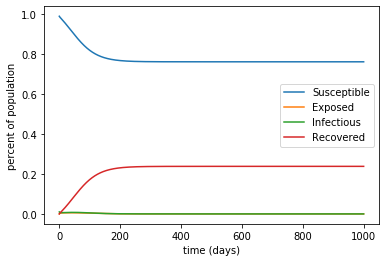

In [58]:
plt.figure(1)
plt.plot(t, sol[:, 0], label = 'Susceptible')
plt.plot(t, sol[:, 1], label = 'Exposed')
plt.plot(t, sol[:, 2], label = 'Infectious')
plt.plot(t, sol[:, 3], label = 'Recovered')
#plt.plot(t, rList, label = 'R0')
plt.xlabel('time (days)')
plt.ylabel('percent of population')
plt.legend()